# Population by Country from 1955 to 2020

![](https://www.plannerweb.com.au/images/world_population_feb_2020.jpg)

## Importing Basic Libraries
Let's import basic libraries first.

In [2]:
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

%matplotlib inline

## Load Data
To work with data, very first step is to load them in python.

In [3]:
%time population = pd.read_csv('')

FileNotFoundError: [Errno 2] File ../input/countries-population-from-1955-to-2020/Countries Population from 1995 to 2020.csv does not exist: '../input/countries-population-from-1955-to-2020/Countries Population from 1995 to 2020.csv'

In [ ]:
# let
population.head(20)

Lets have some statastics of data.

In [ ]:
population.shape
population.info()
population.describe()
# checking NULL value

population.isnull().sum()

In [ ]:
population['Density (P/Km²)'] = population['Density (P/Km²)'].str.replace(',','')
population['Density (P/Km²)'] = population['Density (P/Km²)'].astype(int)
population['Country'] = population['Country'].astype(str)

# Data Analysis and Visualization.

## Top 30 countries by population in 2020.

In [4]:
# 2020 population data
current_population = population[population['Year'] == 2020][:30]

plt.rcParams['figure.figsize'] = (25, 7)
ax = sns.barplot(x = current_population['Country'][:30], y = current_population['Population'][:30], palette = 'dark')
ax.set_xlabel(xlabel = 'Countries', fontsize = 10)
ax.set_ylabel(ylabel = 'Population in Billion', fontsize = 10)
ax.set_title(label = 'Population of top 30 countries in 2020', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

NameError: name 'population' is not defined

In [ ]:
plt.figure(figsize=(9,25))
ax = sns.barplot(x="Population", y="Country",
                 data=current_population, palette="tab20c",
                 linewidth = 1)
for i,j in enumerate(current_population["Population"]):
    ax.text(.5, i, j, weight="bold", color = 'black', fontsize =10)
plt.title("Population of each country in 2020")
ax.set_xlabel(xlabel = 'Population in Billion', fontsize = 10)
ax.set_ylabel(ylabel = 'Countries', fontsize = 10)
plt.show()

## 2. Total Share in World's population by top 10 countries in 2020.

In [ ]:
unique_countries = population['Country'].unique()
plt.style.use("seaborn-talk")


# set year
year = 2020
df_last_year = population[population['Year'] == year]
series_last_year = df_last_year.groupby('Country')['Population'].sum().sort_values(ascending=False)
print(series_last_year)

labels = []
values = []
country_count = 10
other_total = 0
for country in series_last_year.index:
    if country_count > 0:
        labels.append(country)
        values.append(series_last_year[country])
        country_count -= 1
    else:
        other_total += series_last_year[country]
labels.append("Other")
values.append(other_total)

wedge_dict = {
    'edgecolor': 'black',
    'linewidth': 2        
}

explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

plt.title(f"Total Share of in World's Population the top 10 countries in {year}")
plt.pie(values, labels=labels, explode=explode, autopct='%1.2f%%', wedgeprops=wedge_dict)
plt.show()

**China have highest share in world's population which 18.47%.**

## Country Wise Data Analysis

Lets make country wise data first.

In [ ]:
def country_wise_population(country):
    return population[population['Country'] == country]

### Let's check China's Population

#### Obsevation:
- Since 1995, China is globally rank 1 in population.
- In 1970, China have highest population increment which is more than 20 million. 
- Lowest hike in china's population can be seen in 2020, which is about 5.5 million.

In [ ]:
china_population = country_wise_population('China')

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(china_population['Year'], china_population['Yearly Change'])
plt.title('Yearly Population Change in China')
plt.xlabel('Year')
plt.ylabel('Population in 10 Million')
plt.show()

In [ ]:
china_population[china_population['Yearly Change']==china_population['Yearly Change'].max()][['Year', 'Population', 'Yearly % Change',
                                                                                             'Yearly Change']]

In [ ]:
china_population[china_population['Yearly Change']==china_population['Yearly Change'].min()][['Year', 'Population', 'Yearly % Change',
                                                                                             'Yearly Change']]

### Let's check India's Population

#### Obsevation:
- Since 1995, India is globally rank 2 in population.
- In 2000, India have highest population increment which is more than 18 million. 
- Lowest hike in India's population can be seen in 1955, which is about 6.8 million.

In [ ]:
india_population = country_wise_population('India')

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(india_population['Year'], india_population['Yearly Change'])
plt.title('Yearly Population Change in India')
plt.xlabel('Year')
plt.ylabel('Population in 10 Million')
plt.show()

In [ ]:
india_population[india_population['Yearly Change']==india_population['Yearly Change'].max()][['Year', 'Population', 'Yearly % Change',
                                                                                             'Yearly Change']]

In [ ]:
india_population[india_population['Yearly Change']==india_population['Yearly Change'].min()][['Year', 'Population', 'Yearly % Change',
                                                                                             'Yearly Change']]

### Let's check USA's Population

#### Obsevation:
- Since 1995, United States is globally rank 3 in population.
- In 2000, United States have highest population increment which is little over to 3.3 million. 
- In 1975, United States have lowest hike in population, which is mere 2 million.

In [5]:
usa_populaiton = country_wise_population('United States')

NameError: name 'country_wise_population' is not defined

In [6]:
fig = plt.figure(figsize=(10,5))
plt.plot(usa_populaiton['Year'], usa_populaiton['Yearly Change'])
plt.title('Yearly Population Change in USA')
plt.xlabel('Year')
plt.ylabel('Population in 1 Million')
plt.show()

NameError: name 'usa_populaiton' is not defined

<Figure size 720x360 with 0 Axes>

In [7]:
usa_populaiton[usa_populaiton['Yearly Change']==usa_populaiton['Yearly Change'].max()][['Year', 'Population', 'Yearly % Change',
                                                                                             'Yearly Change']]

NameError: name 'usa_populaiton' is not defined

In [8]:
usa_populaiton[usa_populaiton['Yearly Change']==usa_populaiton['Yearly Change'].min()][['Year', 'Population', 'Yearly % Change',
                                                                                             'Yearly Change']]

NameError: name 'usa_populaiton' is not defined

## Top 5 most populated countries in World.

In [9]:
population_top5_2020 = population[population['Year'] == 2020][:5]
top_5_countries = population_top5_2020['Country'].unique()

NameError: name 'population' is not defined

In [10]:
top5_popultion = population[population['Country'].isin(top_5_countries)][['Year', 'Country', 'Population']]
top5_popultion_pivot = top5_popultion.pivot(index='Year', columns='Country', values='Population')
top5_popultion_pivot.style.background_gradient(cmap='PuBu')

NameError: name 'population' is not defined

NameError: name 'top5_popultion' is not defined

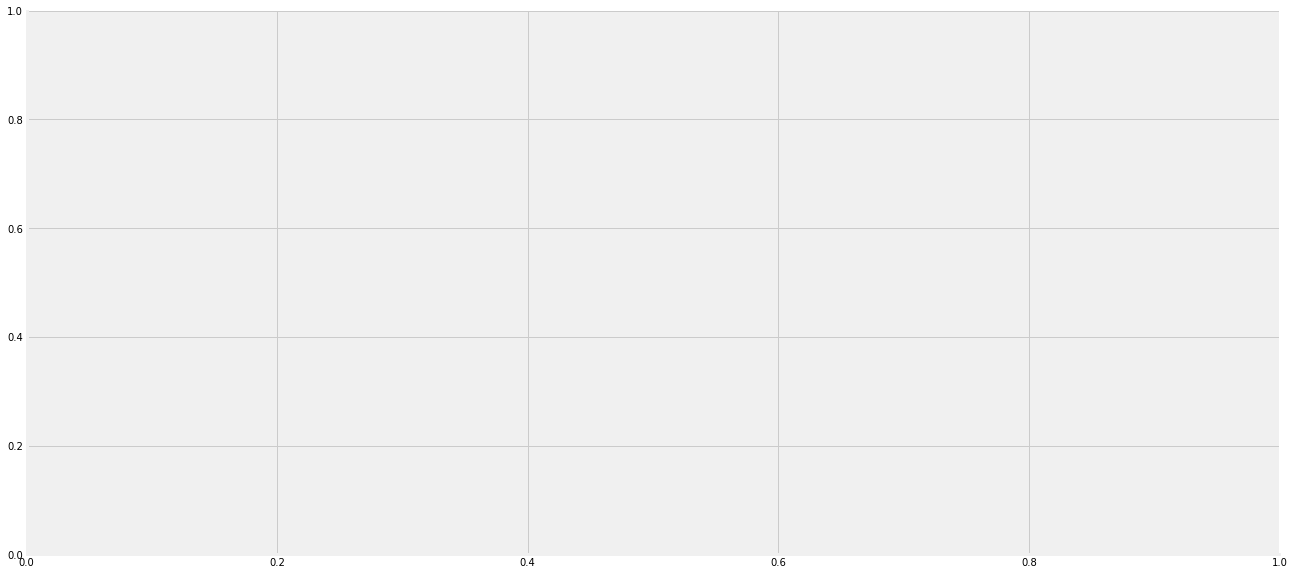

In [11]:
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

sns.barplot(x="Year", y="Population", data=top5_popultion, hue='Country')
ax.set_ylabel(ylabel = 'Population in Billion', fontsize = 10)
ax.set_xlabel(xlabel = 'Year', fontsize = 10)
ax.set_title('Top 5 most populated countries in the World')
ax.legend();

## Which country is Highly dense in 2020?

In [12]:
population_2020 = population[population['Year'] == 2020][['Country','Density (P/Km²)']]

NameError: name 'population' is not defined

In [13]:
fig = px.choropleth(population_2020, locations="Country", 
                    locationmode='country names', color="Density (P/Km²)", 
                    hover_name="Country", range_color=[1,1000], 
                    color_continuous_scale="blues", 
                    title='Density of Countries in 2020')
fig.update(layout_coloraxis_showscale=True)
fig.show()


NameError: name 'population_2020' is not defined

In [14]:
# highest dense country by population
population_2020[population_2020['Density (P/Km²)']==population_2020['Density (P/Km²)'].max()]

NameError: name 'population_2020' is not defined

In [15]:
# lowest dense country by population
population_2020[population_2020['Density (P/Km²)']==population_2020['Density (P/Km²)'].min()]

NameError: name 'population_2020' is not defined

### Macao is Dense country which is 21645 Person per kilometer squre. Whereas Mongolia and Western Sahara are lowest dense countries by population, density of both countries are 2 Person per kilometer square. 